<a href="https://colab.research.google.com/github/kim-daehyun/study_trace/blob/Computer-Statistics/11_Chi_square_test_for_goodness_of_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%matplotlib inline
from scipy import stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Example

In [9]:
# You have assumed the populations as followings:
# Category A : 20%
# Category B : 50%
# Category C : 30%
h0_prop = [ 0.2, 0.5, 0.3]

# Now, you have a sample with 500 values as followings:
# Category A : 120
# Category B : 270
# Category C : 110
n = 500
sample_freq = [ 120, 270, 110]

# Now, you want to test if the sample shows your current assumption is still valid.

# Let's check the significance of the difference by the chi-squre test for goodness of fit.

# Step 1. Define null and alternative hypotheses

In [10]:
# H0
print("H0: The data meets the expected distribution.")

# H1
print("H1: The data does not meet the expected distribution.")

H0: The data meets the expected distribution.
H1: The data does not meet the expected distribution.


# Step 2. Calculate a test statistic

In [16]:
# Chi-squre test statistic
#    = sum of (observation - expectation)^2 / expectation

# Expectation for a category
expect_freq = [500 * n for n in h0_prop]

chi2 = np.sum([ (obs - expect)**2 / expect for obs, expect in zip(sample_freq, expect_freq)  ])

print("Test statistic Chi-Square : {}".format(chi2))

Test statistic Chi-Square : 16.266666666666666


# Step 3. Check how likely the test statistic can be obtained.

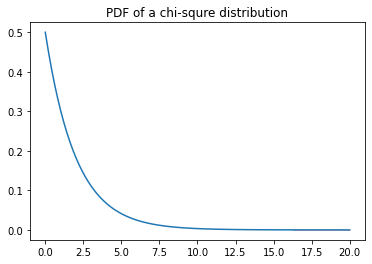

In [18]:
# the chi2 statistic follows chi2 distribution.
chi2_dist = stats.chi2(df = len(sample_freq)- 1)
x = np.linspace(0, 20, 100)
y = chi2_dist.pdf(x)
plt.plot(x,y)
plt.title("PDF of a chi-squre distribution")

# Fill the area of the values to be 
# as extreme as or more extreme than the test statistic. (p-value)
right_interval = np.linspace(chi2, x[-1], 50)
plt.fill_between(right_interval, chi2_dist.pdf(right_interval), color='#e1b1b4', alpha=1)
plt.show()


In [20]:
# Calculate the p-value.
p, _  = integrate.quad(chi2_dist.pdf, right_interval[0], right_interval[-1])

print("p-value : {}".format(p))

p-value : 0.00024818801171382586


In [21]:
# Conclusion (Significance level = 5%)
if p < 0.05:
  print("Reject H0: The data does not meet the expected distribution.")
else:
  print("Accept H0: The data meets the expected distribution.")

Reject H0: The data does not meet the expected distribution.


##### [Additional] You can calculate the p-value by the SF. 

In [22]:
p = chi2_dist.sf( chi2 )    # chi2 =  16.266666666666666
print("p-value : {0}".format(p))  #sf : 입력한 값이 상위 몇 퍼센테이지 인가???

p-value : 0.00029358794147631064


##### [Additional] You can use critical values.

In [23]:
cv = chi2_dist.ppf(.950) #ppf : 입력한 값에 대한 상위 퍼센페이지를 숫자로 ㄱㄱ(비례함) 
print("Critical values (alpha = 0.05): -{0}, {0}".format(cv)) 

# If the test statistic is beyond the critical values, 
# we should reject the null hypothesis.

Critical values (alpha = 0.05): -5.991464547107979, 5.991464547107979


### Or you can use the codes in the stats module.

In [24]:
chi2_, p_ = stats.chisquare(sample_freq, expect_freq)
print("Test statistic chi2: {}".format(chi2_))
print("p-value: {}".format(p_))

Test statistic chi2: 16.266666666666666
p-value: 0.00029358794147631064


# (Step 4) Calculate the effect size

In [25]:
# The effect size for one-sample t-test is Cramer's V.
# V = sqrt (chi2 / (n_total * df_category) ) 

V = np.sqrt(chi2 / (np.sum(sample_freq) * (len(sample_freq)-1) ))

print("Effect size: {}".format(V))

Effect size: 0.12754084313139327
